# k-Nearest Neighbors

Estimar la *pdf* o *función de densidad de probabilidad* mediante la fórmula $$ \hat{p}\left( \mathbf{x} \right) \approx \frac{k / n}{V} $$, donde en el caso de la clasificación
corresponde a tener $n$ **patrones** y $k$ de ellos caen dentro del **volumen** *V.*

Para el algoritmo **KNN** el objetivo es fijar $k$ tal que sólamente se aumente el volumen para tener los $k$ patrones dentro de $V$ y se calcula la probabilidad.

El **algoritmo** es como sigue:

1. El conjunto de entrenamiento son todos los datos, y deben estar **clasificados.**
2. Usando alguna *métrica* en particular se calcula la distancia de un punto a *clasificar* a sus $k$ vecinos.
3. La distancia más corta es la clase a la que pertenece ese punto a *clasificar*.
4. Cuando $k > 1$ entonces se debe emplear la siguinte decisión: la mayor cantidad de puntos pertenecientes a esa clase
   son a la que pertence ese punto a *clasificar*; ejemplo: si $k = 2$ y hay un punto por cada patrón, el de menor distancia
   es al que pertence, pero cuando $k = 3$ y hay 2 de un patrón y 1 de otro patrón, el punto a clasificar pertence a la clase
   de los dos puntos más cercanos.
   
## Complejidad algorítmica

Supóngase que se tienen __n__ muestras de dimensión **d** (i.e. el número de patrones), su complejidad es:

* __O(d)__ para calcular la distancia a una sola muestra.
* __O(nd)__ para calcular la distancia a todas las *n* muestras y encontrar el primer vecino más cercano.
* __O(knd)__ para calcular la distancia a todas las *n* muestras y encontrar la mínima distancia a los *k* vecinos más cercanos.

In [8]:
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 14)

Populating the interactive namespace from numpy and matplotlib


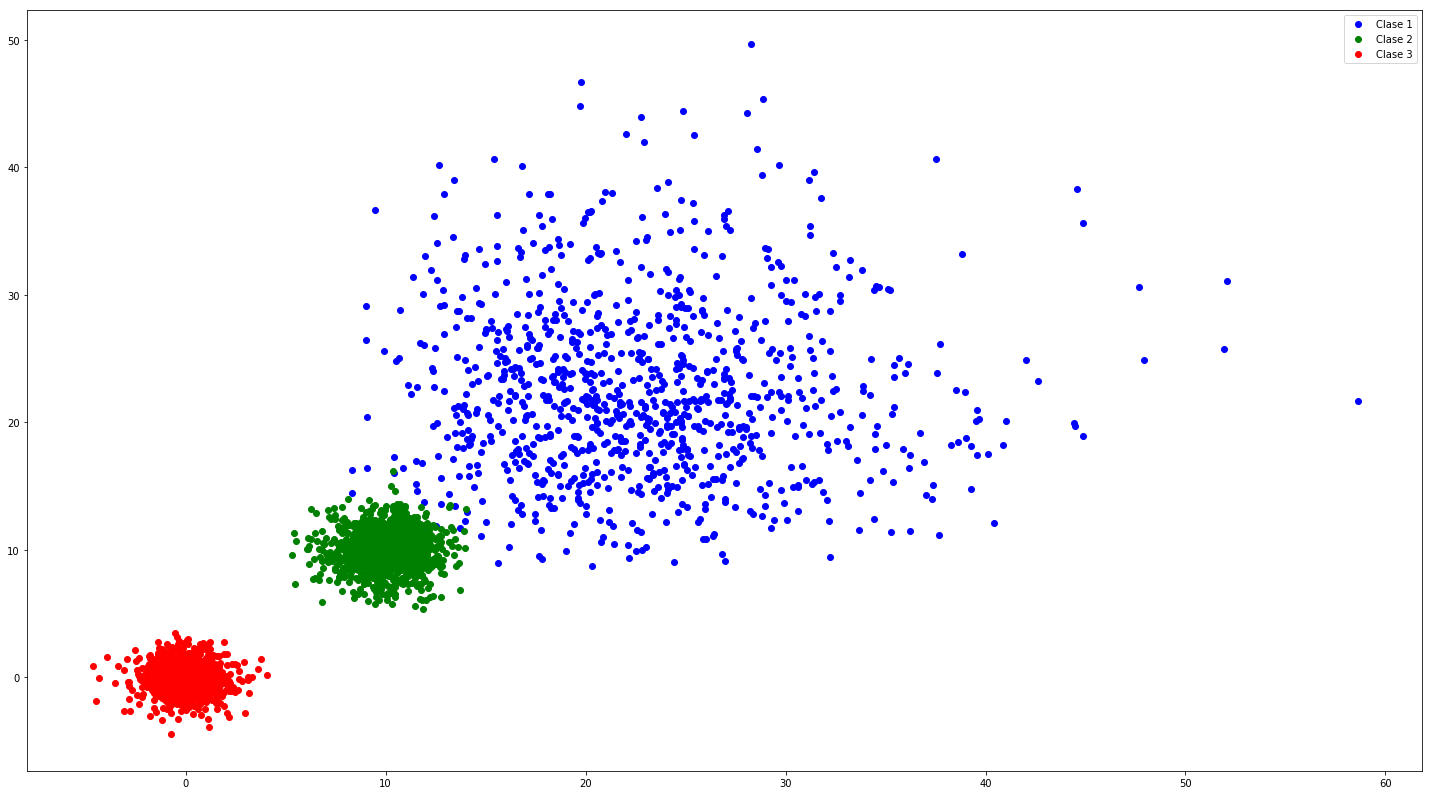

In [9]:
# Crear algunos datos/clases de entrenamiento
clase_1 = random.chisquare(23, (2, 1000))
clase_2 = random.normal(10.0, 1.5, (2, 1000))
clase_3 = random.standard_t(10, (2, 1000))

# Etiquetar los datos de entrenamiento
clases = {'clase_1': clase_1, 'clase_2': clase_2, 'clase_3': clase_3}

# Graficar los datos
scatter(*clase_1, label='Clase 1', color='blue')
scatter(*clase_2, label='Clase 2', color='green')
scatter(*clase_3, label='Clase 3', color='red')
legend(loc='best')

In [10]:
def k_nearest_n(entrena, pred, k):
    # Un diccionario para guardar las distancias
    distancias = dict()
    
    # Iterar sobre todos los valores del conjunto de entrenamiento
    for i, j in entrena.items():
        # Una lista temporal
        list_dist = list()
        # Iterar sobre el número de vecinos definido
        for __ in range(k):
            size_arr = j.shape[1]
            prediccion = [j[[0,1], l:l+1] for l in range(size_arr)]
            # Por cada punto de la lista, encontrar la distancia
            for n in prediccion:
                list_dist.append(linalg.norm(pred - n))
        # Agregar solamente la distancia más corta al diccionario, por clase
        distancias[i] = min(list_dist)
    
    # Devolver la clase que contenga la distancia mínima
    return min(distancias, key=distancias.get)

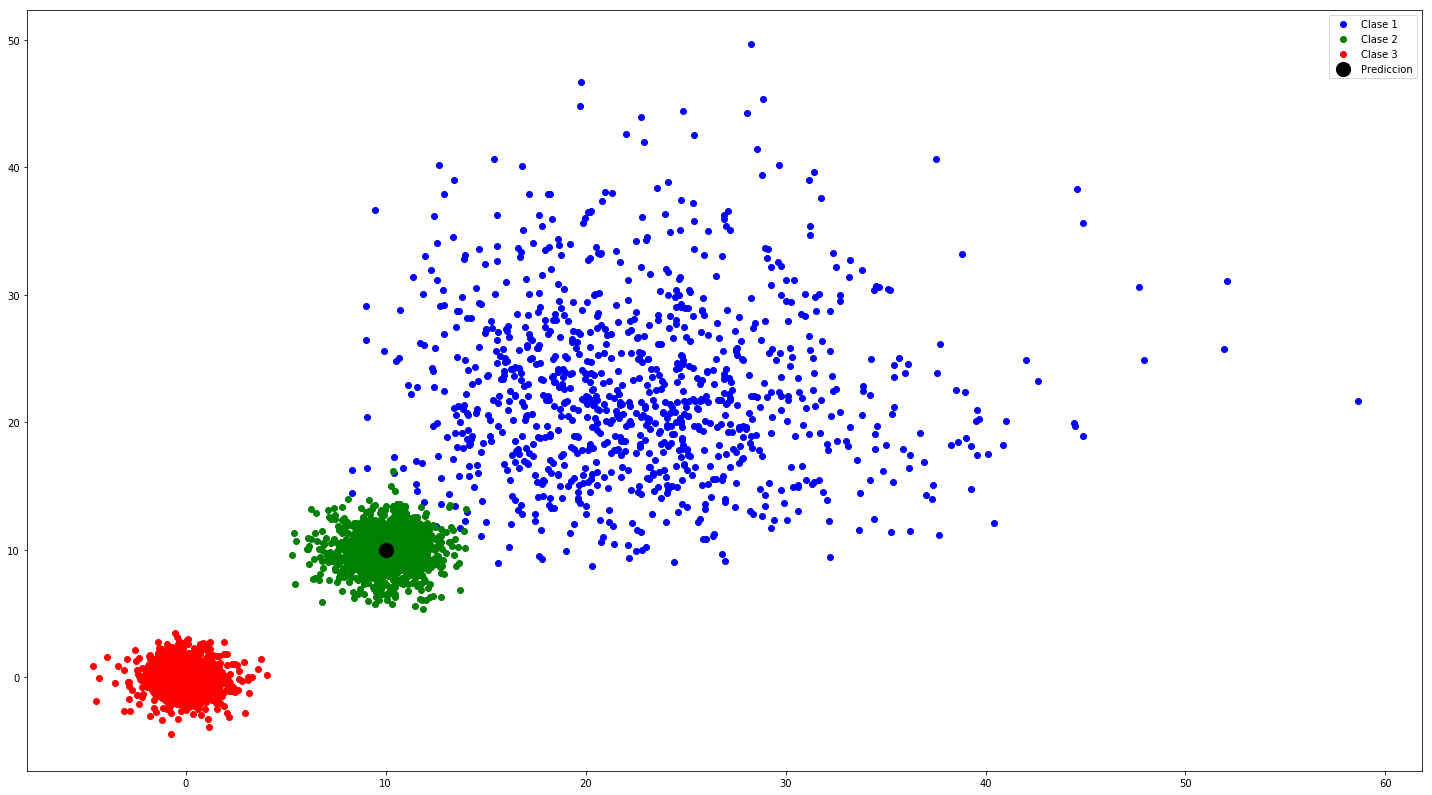

In [11]:
# Un punto para clasificar, pertenece a la clase 2
p_prueba = array([[10.0], [10.0]])

# Graficar los datos
scatter(*clase_1, label='Clase 1', color='blue')
scatter(*clase_2, label='Clase 2', color='green')
scatter(*clase_3, label='Clase 3', color='red')
scatter(*p_prueba, label='Prediccion', color='k', s=200)
legend(loc='best')

In [12]:
k_nearest_n(clases, p_prueba, 7)

'clase_2'

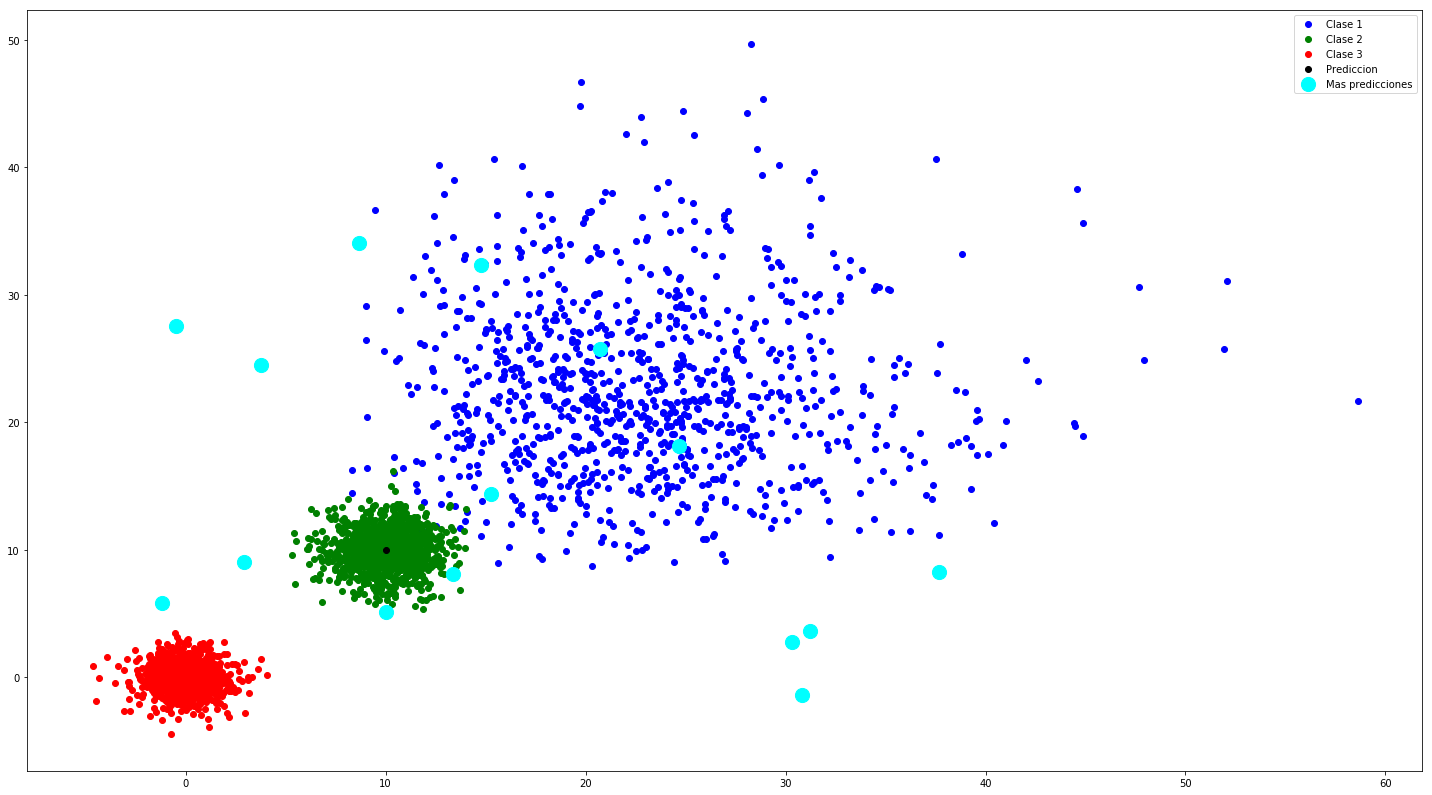

In [27]:
# Puntos adicionales para clasificar, aleatorios
p_prueba_2 = 45.0 * random.random_sample((2, 15)) - 6.0

# Graficar los datos
scatter(*clase_1, label='Clase 1', color='blue')
scatter(*clase_2, label='Clase 2', color='green')
scatter(*clase_3, label='Clase 3', color='red')
scatter(*p_prueba, label='Prediccion', color='k')
scatter(*p_prueba_2, label='Mas predicciones', color='cyan', s=200)
legend(loc='best')

In [28]:
size_arr = p_prueba_2.shape[1]
prediccion = array([p_prueba_2[[0,1], i:i+1] for i in range(size_arr)])
lista_prediccion = array([])
for i in prediccion:
    print(f'Punto: {i}, clase: {k_nearest_n(clases, i, 7)}')
    lista_prediccion = append(lista_prediccion, k_nearest_n(clases, i, 7))

Punto: [[37.67254897]
 [ 8.27322159]], clase: clase_1
Punto: [[30.83202944]
 [-1.41121897]], clase: clase_1
Punto: [[ 3.78609509]
 [24.4892809 ]], clase: clase_1
Punto: [[15.25476529]
 [14.34522673]], clase: clase_1
Punto: [[14.75412551]
 [32.28905805]], clase: clase_1
Punto: [[-0.48061448]
 [27.53881298]], clase: clase_1
Punto: [[ 8.66104472]
 [34.08641289]], clase: clase_1
Punto: [[13.34626138]
 [ 8.095796  ]], clase: clase_2
Punto: [[-1.17313927]
 [ 5.83941111]], clase: clase_3
Punto: [[24.65719018]
 [18.10057886]], clase: clase_1
Punto: [[20.73571877]
 [25.76831482]], clase: clase_1
Punto: [[2.90571206]
 [9.06214249]], clase: clase_2
Punto: [[31.2393452 ]
 [ 3.59314612]], clase: clase_1
Punto: [[30.34124329]
 [ 2.73109355]], clase: clase_1
Punto: [[10.00960416]
 [ 5.13748814]], clase: clase_2


In [35]:
from sklearn import neighbors

n_neighbors = 7

clases_lista = array([])

for i in clases.values():
    clases_lista = append(clases_lista, i)

clases_lista = clases_lista.reshape(-1, 2)
clases_target = array([])

for i in list(clases.keys()):
    clases_target = append(clases_target, full(1000, i))

clfd = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clfd.fit(clases_lista, clases_target)
#print(f'Uniforme: {clfd.score(clases_lista, clases_target)}')
print('Inverso de distancia: {0}'.format(clfd.score(clases_lista, clases_target)))
#print(prediccion.reshape(-1, 2))
print(clfd.predict(prediccion.reshape(-1, 2)))
#print(clf.predict(p_prueba.reshape(-1, 2)))

Inverso de distancia: 0.9956666666666667
['clase_1' 'clase_1' 'clase_1' 'clase_1' 'clase_1' 'clase_1' 'clase_1'
 'clase_2' 'clase_3' 'clase_1' 'clase_1' 'clase_2' 'clase_1' 'clase_1'
 'clase_2']


In [36]:
# Matriz de confusión y reporte
from sklearn.metrics import confusion_matrix, classification_report

y_true = clfd.predict(prediccion.reshape(-1, 2))
matr_conf = confusion_matrix(y_true, lista_prediccion.ravel(), labels=['clase_1', 'clase_2', 'clase_3'])
print(matr_conf)
print(classification_report(y_true, lista_prediccion.ravel(), labels=['clase_1', 'clase_2', 'clase_3']))

[[11  0  0]
 [ 0  3  0]
 [ 0  0  1]]
              precision    recall  f1-score   support

     clase_1       1.00      1.00      1.00        11
     clase_2       1.00      1.00      1.00         3
     clase_3       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



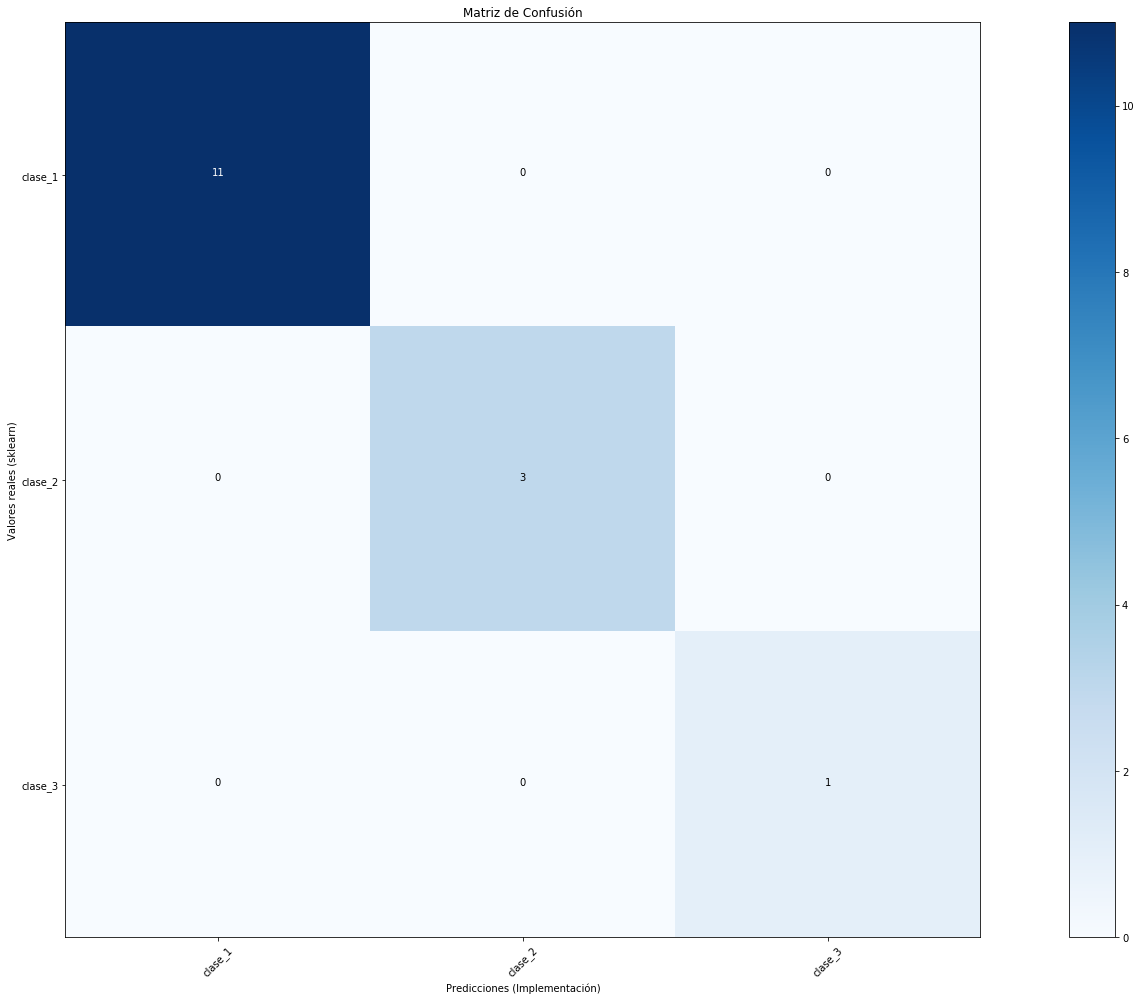

In [37]:
import itertools

# Tomado de https://scikit-learn.org/0.16/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(confm, classes,
                          titulo='Matriz de Confusión',
                          cmap=cm.Blues):

    imshow(confm, interpolation='nearest', cmap=cmap)
    title(titulo)
    colorbar()
    tick_marks = arange(len(classes))
    xticks(tick_marks, classes, rotation=45)
    yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confm.max() / 2.
    for i, j in itertools.product(range(confm.shape[0]), range(confm.shape[1])):
        text(j, i, format(confm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if confm[i, j] > thresh else "black")

    ylabel('Valores reales (sklearn)')
    xlabel('Predicciones (Implementación)')
    tight_layout()

# Graficar
figure()
plot_confusion_matrix(matr_conf, classes=['clase_1', 'clase_2', 'clase_3'],
                      titulo='Matriz de Confusión')

## Conclusiones

* El error proviene de los vecinos, en mi implementación; no se están tomando en cuenta los vecinos de forma correcta.
* Cuando hay traslape de clases, es **fundamental** encontrar a los vecinos más cercanos con alguna estructura de datos adecuada
  (algo semejante a lo que hace *sklearn*).
* Si no hubiera traslape y las clases estuviesen separadas, mi implementación tiene $F1\ score = 1.0$
* Este método es dependiente del número de vecinos (*sklearn*); esto es un parámetro importante, y es *experimental*.